In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
# Reading The Data
data = pd.read_csv('data/facebook_stock.csv', index_col='Date', parse_dates = True)

In [40]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,187.500000,29197800


In [27]:
# Checking for NAN OR Missing Values
data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

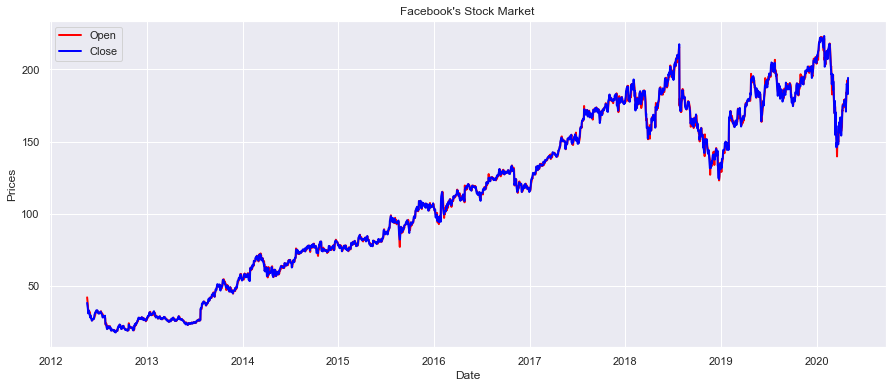

In [28]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['Open'], label='Open', linewidth=2, color='red')
plt.plot(data['Close'], label='Close', linewidth=2, color='blue')

plt.legend()
plt.show()

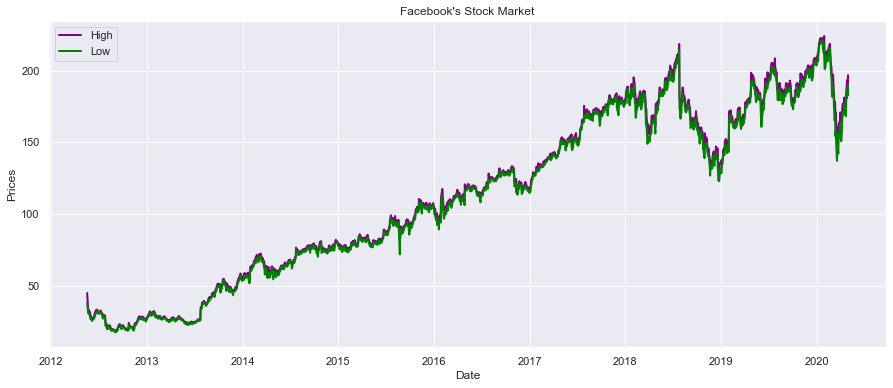

In [29]:
# Visualizing The Data
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market")
plt.xlabel('Date')
plt.ylabel('Prices')

plt.plot(data['High'], label='High', linewidth=2, color='purple')
plt.plot(data['Low'], label='Low', linewidth=2, color='green')

plt.legend()
plt.show()

In [50]:
# Splitting The Data Into Training, Testing Data
training_data = data[data.index < '2019-01-01']
testing_data = data[data.index >= '2019-01-01']

testing_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800
...,...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,187.500000,29197800


In [52]:
# Filtering The DataFrame
training_data = training_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
training_data

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200
...,...,...,...,...,...
2018-12-24,123.099998,129.740005,123.019997,124.059998,22066000
2018-12-26,126.000000,134.240005,125.889999,134.179993,39723400
2018-12-27,132.440002,134.990005,129.669998,134.520004,31202500


In [57]:
# Normalizing The Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_training_data = scaler.fit_transform(training_data)

scaled_training_data

array([[0.12128111, 0.13341652, 0.10395486, 0.10261801, 1.        ],
       [0.09335154, 0.09178937, 0.07853803, 0.08159383, 0.28587298],
       [0.07351751, 0.07646619, 0.0680663 , 0.06642639, 0.16889149],
       ...,
       [0.57862782, 0.58258052, 0.56994711, 0.58462234, 0.04455   ],
       [0.59330093, 0.58722237, 0.58280803, 0.5780147 , 0.02944439],
       [0.5887978 , 0.58083355, 0.57137045, 0.56745255, 0.03296355]])

In [66]:
# Spitting The Data Into X_train, y_train
X_train = []
y_train = []

for i in range(60, scaled_training_data.shape[0]):
    X_train.append(scaled_training_data[i-60:i])
    y_train.append(scaled_training_data[i,[0, 3]])

In [70]:
# Converting Lists Into Numpy Arrays
X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((1605, 60, 5), (1605, 2))

## Building The Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

In [73]:
model = Sequential()

# Adding the first LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

# Adding the second LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding the third LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding the fourth LSTM layer & Dropout
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding the fifth LSTM layer & Dropout
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the final Dense layer
model.add(Dense(units = 2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [74]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            2

In [77]:
# Compile The Model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [78]:
# Train The Model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
1605/1605 [==============================] - 16s 10ms/sample - loss: 0.0365
Epoch 2/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0056
Epoch 3/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0044
Epoch 4/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0043
Epoch 5/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0042
Epoch 6/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0044
Epoch 7/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0040
Epoch 8/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0034
Epoch 9/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0036
Epoch 10/100
1605/1605 [==============================] - 13s 8ms/sample - loss: 0.0033
Epoch 11/100
1605/1605 [==========

## Testing Data Preprocessing

In [81]:
# Filtering The Test Data
testing_data = testing_data.filter(['Open', 'High', 'Low', 'Close', 'Volume'])
testing_data

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800
...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,29197800


In [84]:
# Get past 60 days data from the training data
past_60_days_data = training_data.tail(60)

In [86]:
# Create The New Testing DataFrame
new_testing_data = past_60_days_data.append(testing_data)
new_testing_data

,Open,High,Low,Close,Volume
Date,,,,,
2018-10-04,161.460007,161.460007,157.350006,158.850006,25739600
2018-10-05,159.210007,160.899994,156.199997,157.330002,25744000
2018-10-08,155.539993,158.339996,154.389999,157.250000,24046000
2018-10-09,157.690002,160.589996,157.419998,157.899994,18844400
2018-10-10,156.820007,157.690002,151.309998,151.380005,30610000
...,...,...,...,...,...
2020-04-23,184.080002,187.050003,183.149994,185.130005,21426600
2020-04-24,183.229996,190.410004,180.830002,190.070007,28868500
2020-04-27,192.660004,193.750000,187.410004,187.500000,29197800


In [88]:
# Normalizing The Data
scaled_testing_data = scaler.transform(new_testing_data)
scaled_testing_data

(394, 5)

In [89]:
# Splitting The Test Data Into X_test, y_test
X_test = []
y_test = []

for i in range(60, scaled_testing_data.shape[0]):
    X_test.append(scaled_testing_data[i-60:i])
    y_test.append(scaled_testing_data[i,[0,3]])

In [93]:
# Converting Lists Into Numpy Array
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

((334, 60, 5), (334, 2))

In [94]:
# Evaluate The Model
loss = model.evaluate(X_test, y_test)
loss

334/334 [==============================] - 1s 3ms/sample - loss: 0.0012


0.0012272340956584601

## Predictions

In [109]:
# Make Predictions
predictions = model.predict(X_test)

predicted_open = predictions[:, 0]
predicted_close = predictions[:, 1]

In [110]:
# Check Scale
scaler.scale_

array([5.05970449e-03, 4.99126541e-03, 5.08336709e-03, 5.00575662e-03,
       1.76160763e-09])

In [111]:
scale_open = 1/5.05970449e-03
scale_close = 1/5.00575662e-03

# Unscaling The Predictions
predicted_open = predicted_open * scale_open
predicted_close = predicted_close * scale_close

In [112]:
# Unscaling the y_test
actual_open = y_test[:, 0]
actual_close = y_test[:, 1]

actual_open = actual_open * scale_open
actual_close = actual_close * scale_close

In [114]:
# Create The DataFrame For Actual_Open VS Predicted_Open
new_open_df = pd.DataFrame({"Actual Open": actual_open, "Predicted Open": predicted_open})

new_open_df

,Actual Open,Predicted Open
0,110.910005,115.025543
1,116.610002,115.738602
2,115.929995,116.196770
3,119.479998,116.602737
4,121.809999,117.216408
...,...,...
329,166.000002,154.718124
330,165.149996,156.209625
331,174.580004,158.426422
332,170.580004,160.905777


## Visualizing Open Prices

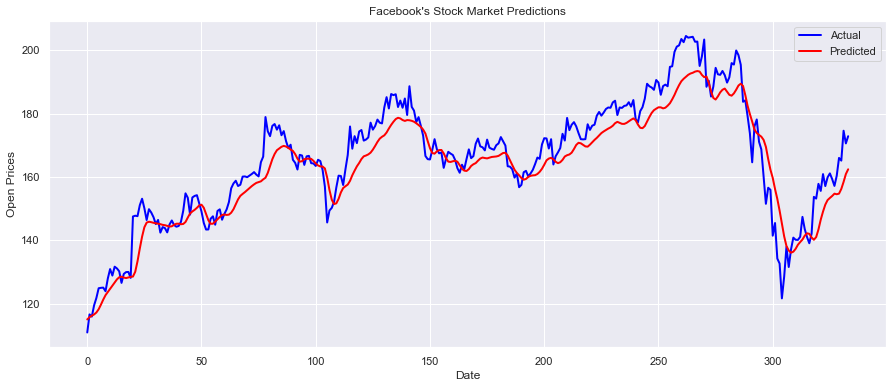

In [115]:
# Visualizing The Open Prices
sns.set(style='darkgrid')
plt.figure(figsize=(15, 6))

plt.title("Facebook's Stock Market Predictions")
plt.xlabel('Date')
plt.ylabel('Open Prices')

plt.plot(new_open_df['Actual Open'], label='Actual', linewidth=2, color='blue')
plt.plot(new_open_df['Predicted Open'], label='Predicted', linewidth=2, color='red')

plt.legend()
plt.show()

In [ ]:
# Create The DataFrame For Actual_Close VS Predicted_Clo
new_open_df = pd.DataFrame({"Actual Open": actual_open, "Predicted Open": predicted_open})

new_open_df